<a href="https://colab.research.google.com/github/5ASAKOV/pppo_clasification_project/blob/main/pppo_clasification_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KLASIFIKACIJA SLIKA**

Klasifikacija slika je postupak kategorizacije i označavanja grupa piksela ili vekora unutar slike. Zadatak klasifikacije je da u potpunosti razume sliku u celini, te da na osnovu toga, donese adekvatne zaključke o tome šta se na njoj nalazi. Obično se odnosi na slike na kojima se pojavljuje i analizira samo jedan objekat. Obavlja se po određenim pravilima i postoje dve opšte metode a tu su "supervised" - nadgledanje i  "unsupervised" - nenadgledanje. 

*Supervised* - ova klasifikacija koristi spektralne klastere dobijene iz uzoraka za obuku. Zatim, pomoću alatki koje se koriste za klasifikaciju lako se može izvršiti trening podataka i predstavljanje željene klase sa uzoraka. 

*Unsupervised* - ova klasifikacija pronalazi spektralne klastere na slici sa više objekata bez "intervencije" analitičara - samim tim, odatle potiče i ime nenadgledanja klasifikacije.



**SET PODATAKA**

Glavnu ulogu u segmentaciji slike ima ***set podataka*** kojim se manipuliše. Potrebno je razumevanje i poznavanje seta podataka kako bi se razumelo na koji način je najbolje raditi sa njim. Klasifikacija biljaa po lišću je veoma koristan način za istraživanje biljnih vrsta jer svaki list ima svoju teksturu. Najčešća klasifikacija lišća može se posmatrati prema strukturi (da li je list jednostavan ili složen? ako list izraste sa jedne stabljike on ima jednostavnu strukturu, ako jedna stabljika ima tri ili više listova, ta biljka ima složenu strukturu.)

Listovi se klasifikuju kao naizmenični, spiralni, suprotni ili kovrdžavi.

**Cilj** ovog seta podataka je da se pomoću binarnih slika lišća sa izdvojenim karakteristikama koje uključuju oblik marginu i teksturu, identifikuje preko 99 vrsta biljaka. Prvi korak je kreiranje klasifikatora koji koristi unapred izdvojene karakteristike, nakon čega se pravi skup funkcija i na kraju se ispituje greška. 

Svaka slika označena je pravom vrstom i za svaku sliku treba da postoji skup predvidjenih verovatnoca. **.csv** datoteke sadrže ID slike, imena svih vrsta biljaka i verovatnoćom za pojavljivanje za svaku vrstu. 

**PRILOŽEN KOD**

Početak ovog projekta, rezervisan je za instaliranje odgovarajućih biblioteka koje su neophodne za njegovu realizaciju. Prva je **Numpy** - NumPy je Python biblioteka koja se koristi za rad sa nizovima. Takođe ima funkcije za rad u domenu linearne algebre, Furijeove transformacije i matrica. NumPy je skraćenica od Numerical Python.

Druga je **Pandas** - biblioteka koja služi za manipulisanje podacima koje preuzima iz seta podataka (slike, folderi, .csv fajlovi).

Poslednji import za ovaj deo koda odnosi se na prolazak kroz sve podatke u setu podataka, nakon što mu se zada putanja na kojoj se podaci nalaze. Podaci su, u mom slučaju, podignuti na nalog na mom Drive-u i odatle sam koristio dobijeni set podataka. Nakon što se podaci uvezu, ovim zavrpavamo ovaj korak.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/#4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/#4/train.csv
/content/drive/MyDrive/#4/test.csv
/content/drive/MyDrive/#4/sample_submission.csv
/content/drive/MyDrive/#4/images/1021.jpg
/content/drive/MyDrive/#4/images/907.jpg
/content/drive/MyDrive/#4/images/403.jpg
/content/drive/MyDrive/#4/images/1161.jpg
/content/drive/MyDrive/#4/images/1219.jpg
/content/drive/MyDrive/#4/images/886.jpg
/content/drive/MyDrive/#4/images/994.jpg
/content/drive/MyDrive/#4/images/66.jpg
/content/drive/MyDrive/#4/images/414.jpg
/content/drive/MyDrive/#4/images/665.jpg
/content/drive/MyDrive/#4/images/1094.jpg
/content/drive/MyDrive/#4/images/379.jpg
/content/drive/MyDrive/#4/images/191.jpg
/content/drive/MyDrive/#4/images/1153.jpg
/content/drive/MyDrive/#4/images/670.jpg
/content/drive/MyDrive/#4/images/880.jpg
/content/drive/MyDrive/#4/images/361.jpg
/content/drive/MyDrive/#4/images/372.jpg
/content/drive/MyDrive/#4/images/1252.jpg
/content/drive/MyDrive/#4/images/241.jpg
/content/drive/MyDrive/#4/images/454.jpg
/content/drive/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Označavanje putanja** - u sledećim kodovima naznačene su putanje ka podacima. 

In [ ]:
z_samp = "/content/drive/MyDrive/#4/sample_submission.csv" # putanja ka .csv fajlu sa podacima kao sto su id slike, vrsta biljke i verovatnoca

In [ ]:
z = "/content/drive/MyDrive/#4/train.csv" # podaci za trenrianje

In [ ]:
z_img = "/content/drive/MyDrive/#4/images" # slike za klasifikaciju

In [ ]:
z_test = "/content/drive/MyDrive/#4/test.csv" # podaci za testiranje

In [ ]:
os.listdir()  #ova komanda koristi se za dobijanje liste svih datoteka u navedenom trenutnom direktorijumu

['.config', 'drive', 'sample_data']

In [ ]:
len(os.listdir(z_img)) #duzina podataka - broj fotografija koji se nalazi na prethodnoj definisanoj putanji. To znaci da se u nasem folderu sa slikama nalazi 1584 slike.

1584

**Matplotlib.pzplot paket** - instaliranjem ovog paketa omogućava se manipulisanje elementima što označava stvaranje figure, područja za crtanje, linija, osa, dodavanje oznaka na crtežima i slično. Na ovaj način, prilikom učitavanja slika, određujemo im dimenziju u kojoj će biti prikazane i to je u ovom slučaju (20,15). Putem funckije **random** na slučajan nasumičan način izdvajaju se 25 fotografija iz foldera images što je i prikazano u priloženom kodu.

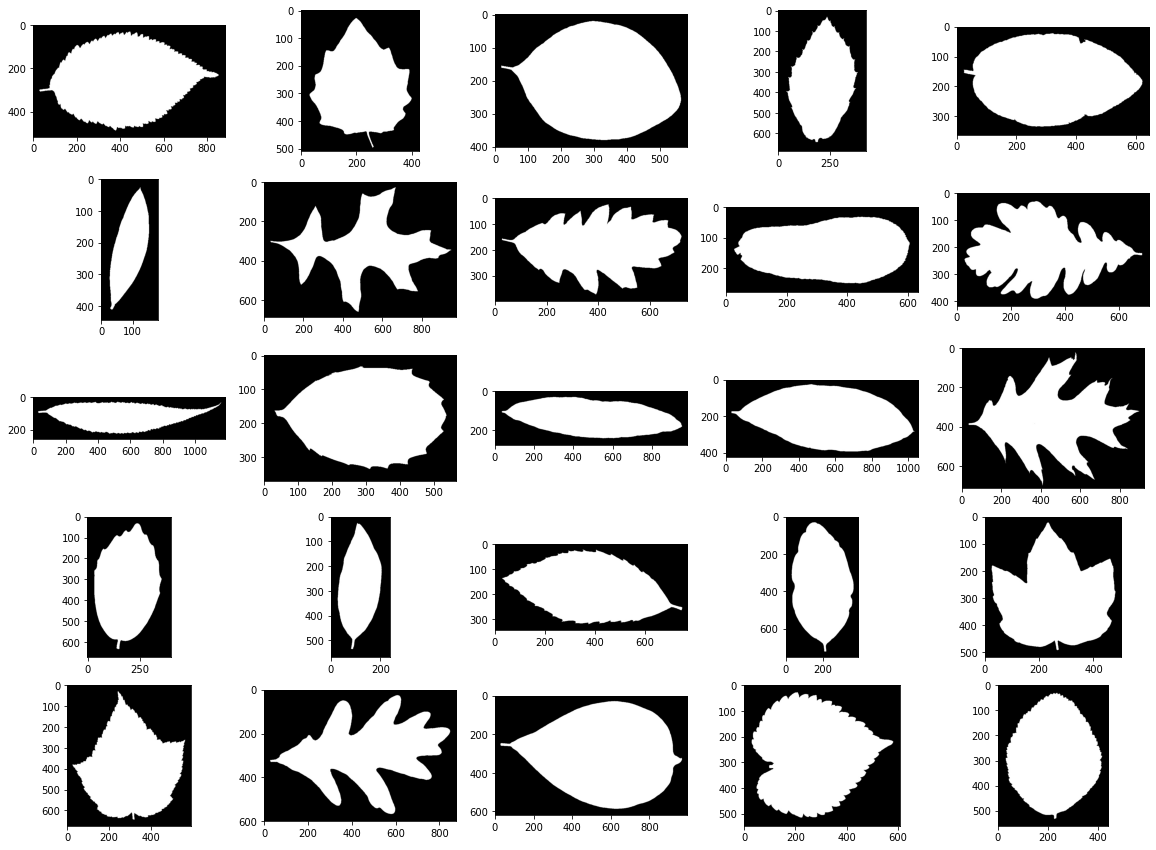

In [ ]:
,import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir(z_img)))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/content/drive/MyDrive/#4/images',j))
    plt.imshow(img)

# New Section

**Učiavanje .csv fajlova** - učitavamo .csv fajlove train i test koji će nam sluđiti za testiranje i poređenje dobijenih rezultata. **index_col=False** se koristi kako bi specificirao da pandas ne koristi prvi kolonu kao index.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/#4/train.csv',index_col=False)
dftest=pd.read_csv('/content/drive/MyDrive/#4/test.csv',index_col=False)

**Funkcija .head()** učitava prvih 5 redova iz datog fajla. Ovo radimo za obe definisanje promenljive (df - koja se odnosi na podatke za treniranje i dftest - koja se odnosi na podatke za testiranje)

In [ ]:
df.head()


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [ ]:
dftest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,...,0.014648,0.017578,0.000977,0.002930,0.034180,0.010742

Sklearn predstavlja alat za kodiranje nivoa kategorijskih karakteristika u numeričke vrednosti. Numerička vrednost može biti izmedju 0 i 1. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(df.species)
labels=le.transform(df.species)
classes=list(le.classes_)

Ispis klasa iz datoteke

In [ ]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

Ranije gore smo učitali celu .csv datoteku koja je sadržala id, vrstu biljke i margine. Za potrebe daljeg treniranja i testiranja neophodne su nam samo margine i zato na sledei način iz datog fajla ne prikazujemo id i vrstu biljke - grubo rečeno izbacujemo ih.

In [ ]:
df=df.drop(['id','species'],axis=1)
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

Nakon "izbacivanja" tabela izgleda ovako:

In [ ]:
dftest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,0.007812,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,0.009766,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,0.023438,...,0.014648,0.017

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


**Pripremanje podataka**

Podatke delimo na dva skupa podataka i to su podaci za testiranje i za treniranje. **Train test split** je funckija za podelu pdoataka u dva podskupa i to su podaci za obuku i podaci za testiranje i ona pravi nasumicne particije za ta dva podskupa. Test size je velicina podataka koji se moraju podeliti u taj skup za testiranje i ta vrednost data je u razlomku  tj. u ovom slucaju je to 0,20 znaci skup podataka ce se podeliti 20% kao testni skup podataka.

In [ ]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

**SGD Klasifikator** je linerani klasifikator sa SGD obukom. Ovo je jedan od algoritama koji pomaže u proceni klasifikacije. Najčešće se koristi za velike količine podataka i efikasan je i lak za primenu, te sam se zbog toga opredelio za korišćenje ovog algoritma. Ovaj algoritam funkcionise u nekoliko koraka koji su i obrađeni do kraja ovog koda i to su:


1.   Priprema podataka (deo koda iznad ovog polja text)
2.   Obučavanje modela 
3. 	Predviđanje i provera tačnosti




In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model = make_pipeline(StandardScaler(), SGDClassifier()) #treniranje modela na osnovu algoritma

print(model.fit(X_train,y_train))

print(model.score(X_test,y_test))


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)
0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


**Provera tačnosti datog modela** - nakon što je testiranje završeno u prethodnom koraku, ostalo nam je da proverimo ocenu tačnosti modela što radimo na sledeći način: 

In [ ]:
models = pd.DataFrame({
    'Model': ['SGDClassifier'],

    'Score': [model.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
0,SGDClassifier,98.484848


Sledeći korak odnosi se na **predviđanje podataka**. 

Podatke možemo predvideti koristeći prethodno obučen model, a nakon predviđanja proverićemo nivo tačnosti.

In [ ]:
test_pred = model.predict(dftest)

In [ ]:
print(test_pred)
#u odnosu na model koji smo trenirali, prikazani su ID slika koje su najslicnije modelu

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 34 60 17 75 27 51 31 39 23 23  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 73 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 69 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 69 95  3 35 83 60 59 58  0 50 62 38 93 68 55

**Kreiranje i upisivanje izveštaja o klasifikaciji** 

In [ ]:
sample_df=pd.read_csv('/content/drive/MyDrive/#4/sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  ...  Viburnum_x_Rhytidophylloides  Zelkova_Serrata
0       4         0.010101  ...                      0.010101         0.010101
1       7         0.010101  ...                      0.010101         0.010101
2       9         0.010101  ...                      0.010101         0.010101
3      12         0.010101  ...                      0.010101         0.010101
4      13         0.010101  ...                      0.010101         0.010101
..    ...              ...  ...                           ...              ...
589  1576         0.010101  ...                      0.010101         0.010101
590  1577         0.010101  ...                      0.010101         0.010101
591  1579         0.010101  ...                      0.010101         0.010101
592  1580         0.010101  ...                      0.010101         0.010101
593  1583         0.010101  ...                      0.010101         0.010101

[594 rows x 100 columns]


**Prikaz ID lista i prediktivnog ID-a slike sa kojim se istrenirani model najviše poklapa**

In [ ]:
output = pd.DataFrame({'Id': test_id,
                       
                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()



,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


Nakon svih prikazanih koraka, spajamo labele koje smo kroz dati algoritam uklonili, kako bi se prikazali svi u jednoj tabeli. To znači da sada dodajemo ID lista, label i prediktivni ID sa kojim se najviše poklapa

In [ ]:
final=pd.concat([output,sample_df],axis=1)
final.head()



,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0